In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval

data = pd.read_csv("tn.csv") 
data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

In [64]:
data.head()

,time,d_l,d_r,llen,rlen,left_gps_x,left_gps_y,left_gps_z,right_gps_x,right_gps_y,right_gps_z,subject_x,subject_y,subject_z,v_r,v_l,robot_z,robot_x
0,64,0.000000,0.000000,0.481907,0.491554,-0.288035,0.079909,-0.386355,-0.422170,0.079904,-0.251790,0.000000,0.06,0.000000,0.000000,0.000000,-0.319073,-0.288035
1,128,0.011713,0.011481,0.493620,0.503035,-0.288024,0.079880,-0.386346,-0.422159,0.079877,-0.251781,0.008378,0.06,0.008378,0.118452,0.111490,-0.319063,-0.288024
2,192,0.023244,0.022799,0.505151,0.514353,-0.287880,0.079867,-0.386203,-0.422019,0.079866,-0.251641,0.016755,0.06,0.016755,0.235895,0.222537,-0.318922,-0.287880
3,256,0.034544,0.033908,0.516451,0.525462,-0.287567,0.079863,-0.385891,-0.421716,0.079862,-0.251340,0.025132,0.06,0.025133,0.350788,0.331733,-0.318616,-0.287567
4,320,0.045611,0.044807,0.527518,0.536361,-0.287085,0.079862,-0.385411,-0.421252,0.079861,-0.250877,0.033509,0.06,0.033510,0.463146,0.439033,-0.318144,-0.287085


<IPython.core.display.Javascript object>


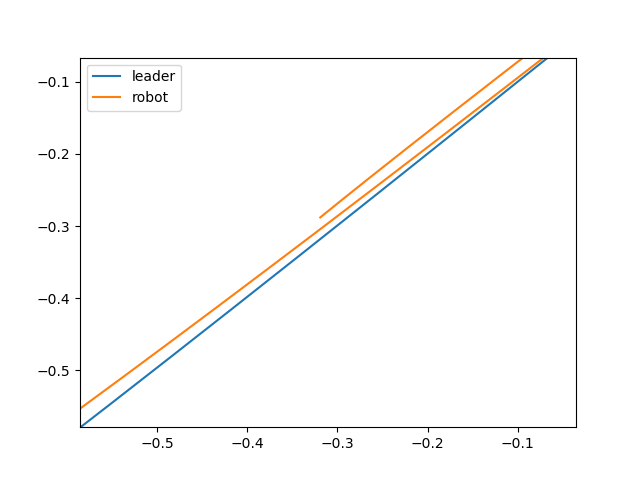

In [65]:
%matplotlib notebook

plt.plot(data['subject_z'], data['subject_x'], label='leader')
plt.plot(data['robot_z'], data['robot_x'], label='robot')
plt.legend()
plt.show()

In [56]:
rz = np.array(data['robot_z'])
rx = np.array(data['robot_x'])
robot_coords = np.array(list(zip(rz, rx)))

lz = np.array(data['subject_z'])
lx = np.array(data['subject_x'])
leader_coords = np.array(list(zip(lz, lx)))

In [5]:
leader_path_cum_length = [0]

for i in range(1, len(leader_coords)):
    dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
    leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)
    
robot_dist_to_leader_path, distance_score = normal_distance_eval(robot_coords, leader_coords)

<IPython.core.display.Javascript object>


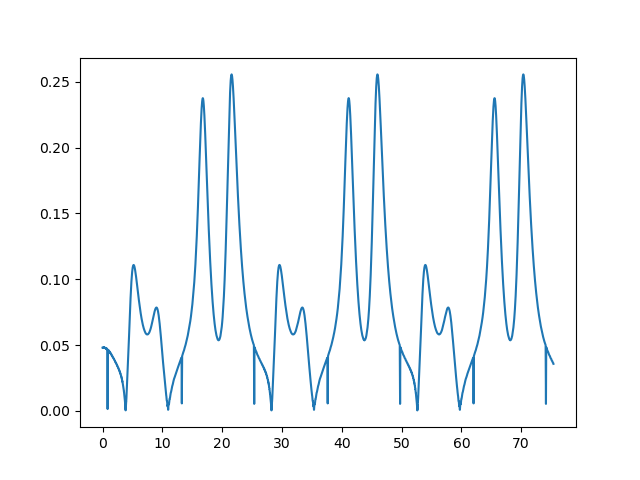

In [13]:
%matplotlib notebook

plt.plot(leader_path_cum_length, robot_dist_to_leader_path)
plt.show()

In [7]:
print('Total distance to leader:', distance_score)

Total distance to leader: 803.3070397989019


# Lemniscates

Generate the trajectory for the leader mathematically using lemniscates

In [8]:
%matplotlib notebook

def plot_lemniscate_animated(ts, xs, ys, xlim = (-1, 1), ylim=(-1, 1)):
    fig,ax = plt.subplots(1,1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    line, = ax.plot([], [])
    for i in range(len(ts) + 1):
        line.set_xdata(xs[0:i])
        line.set_ydata(ys[0:i])
        fig.canvas.draw()
        
    plt.show()

## Gerono Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [9]:
def generate_gerono_lemniscate_t(coords_len):
    p1 = np.arange(0, np.pi + 0.000001, (np.pi)/(coords_len/2))
    p2 = np.arange(-np.pi - 0.000001, 0, (np.pi)/(coords_len/2))
#     print(p1)
#     print(p2)
    return np.concatenate((p1, p2))

<IPython.core.display.Javascript object>


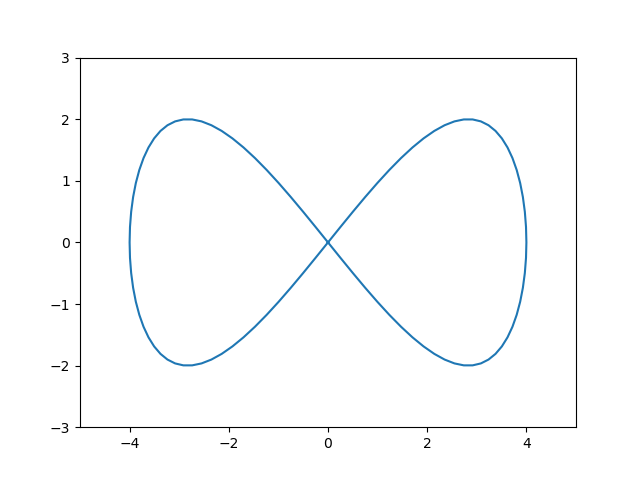

In [10]:
%matplotlib notebook

A = 4
ts = np.array(generate_gerono_lemniscate_t(100))
xs = np.array([A * np.sin(t) for t in ts])
ys = np.array([A * np.sin(t) * np.cos(t) for t in ts])

plot_lemniscate_animated(ts, xs, ys, (-5,5), (-3,3))

In [28]:
generate_gerono_lemniscate_t(4000)[3950]

-0.08011161266673028

In [37]:
A = 4
tp = -0.08011161266673028
print(A * np.sin(tp))
print(A * np.sin(tp) * np.cos(tp))

-0.3201037966712771
-0.3190771535651429


## Bernoulli Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [11]:
def generate_bernoulli_lemniscate_t(coords_len):
    p1 = np.arange(np.pi/2, 0, -(np.pi)/(coords_len/2))
    p2 = np.arange(0, -np.pi, -(np.pi)/(coords_len/2))
    p3 = np.arange(np.pi, np.pi/2 - 0.0001, -(np.pi)/(coords_len/2))
    return np.concatenate((p1, p2, p3))

<IPython.core.display.Javascript object>


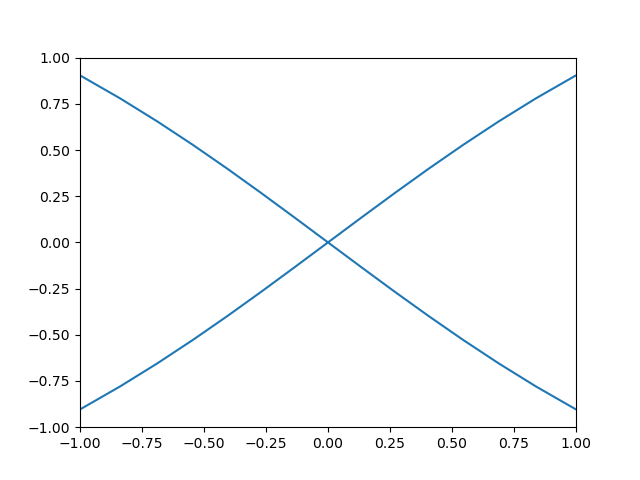

In [12]:
A = 3
ts = np.array(generate_bernoulli_lemniscate_t(100))
xs = np.array([(A * np.sqrt(2) * np.cos(t))/(np.sin(t)**2 + 1) for t in ts])
ys = np.array([(A * np.sqrt(2) * np.cos(t) * np.sin(t)/(np.sin(t)**2 + 1)) for t in ts])

plot_lemniscate_animated(ts, xs, ys)